In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import cm

import geopandas as gpd
from shapely.geometry import Polygon
from dbfread import DBF
import jenkspy
import json
from jenkspy import jenks_breaks
import time

# Configurar la fuente como predeterminada en Matplotlib
plt.rcParams['font.family'] = 'Century Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'regular'
plt.rcParams["image.cmap"] = "tab20c"
colors = plt.get_cmap()(np.linspace(0.19, 0, 3))

magma


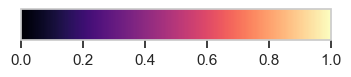

inferno


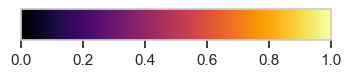

plasma


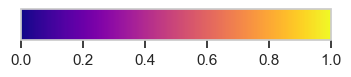

viridis


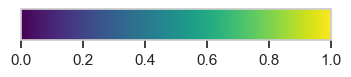

cividis


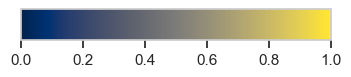

twilight


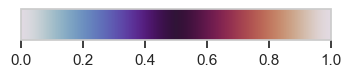

twilight_shifted


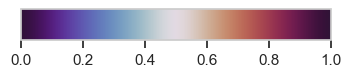

turbo


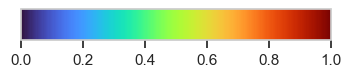

Blues


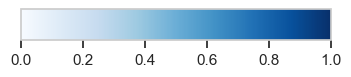

BrBG


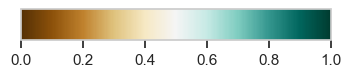

BuGn


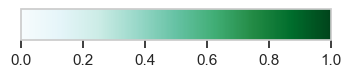

BuPu


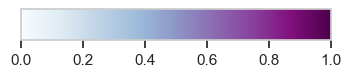

CMRmap


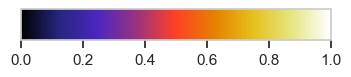

GnBu


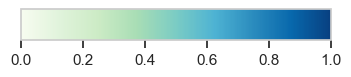

Greens


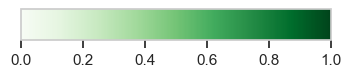

Greys


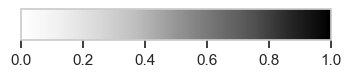

OrRd


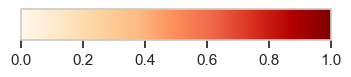

Oranges


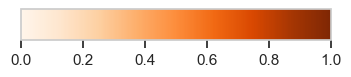

PRGn


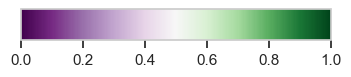

PiYG


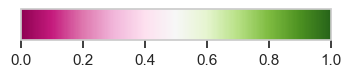

PuBu


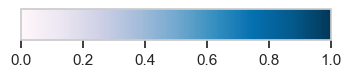

PuBuGn


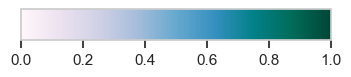

PuOr


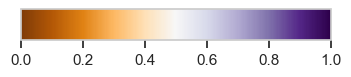

PuRd


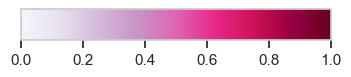

Purples


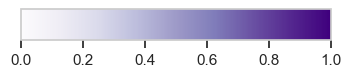

RdBu


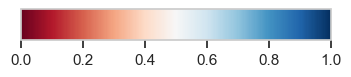

RdGy


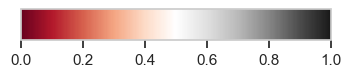

RdPu


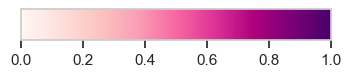

RdYlBu


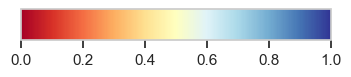

RdYlGn


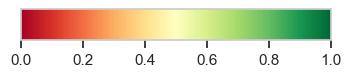

Reds


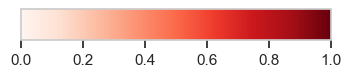

Spectral


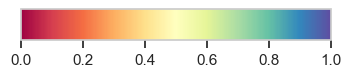

Wistia


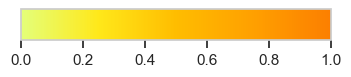

YlGn


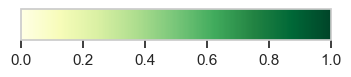

YlGnBu


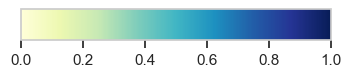

YlOrBr


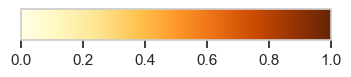

YlOrRd


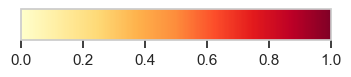

afmhot


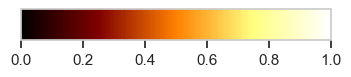

autumn


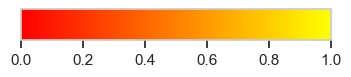

binary


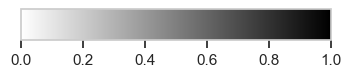

bone


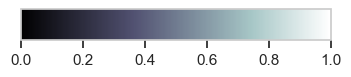

brg


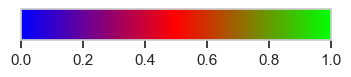

bwr


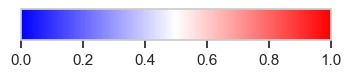

cool


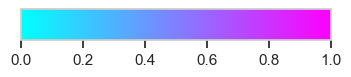

coolwarm


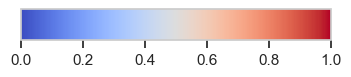

copper


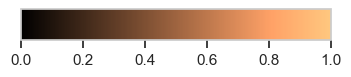

cubehelix


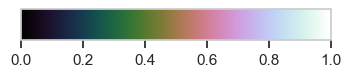

flag


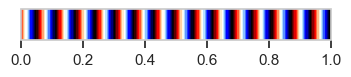

gist_earth


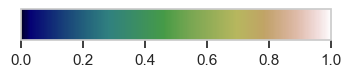

gist_gray


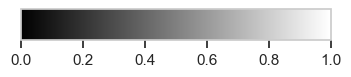

gist_heat


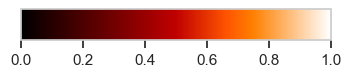

gist_ncar


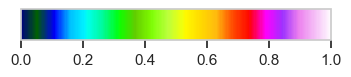

gist_rainbow


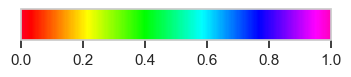

gist_stern


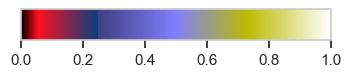

gist_yarg


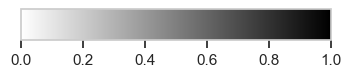

gnuplot


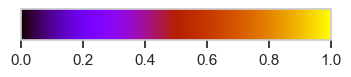

gnuplot2


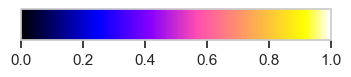

gray


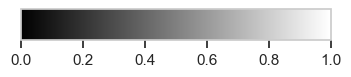

hot


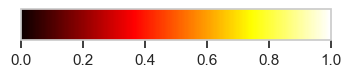

hsv


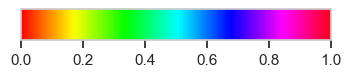

jet


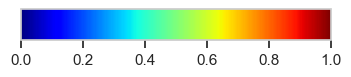

nipy_spectral


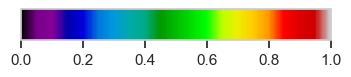

ocean


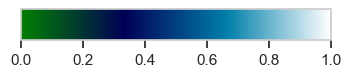

pink


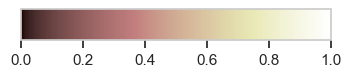

prism


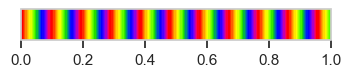

rainbow


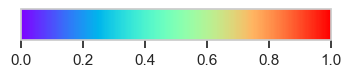

seismic


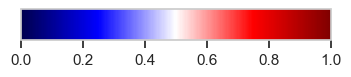

spring


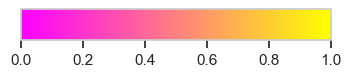

summer


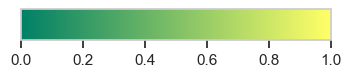

terrain


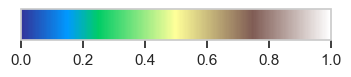

winter


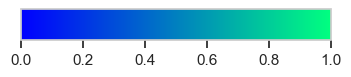

Accent


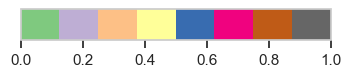

Dark2


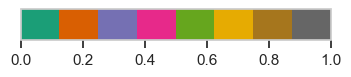

Paired


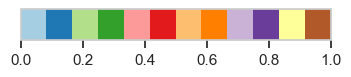

Pastel1


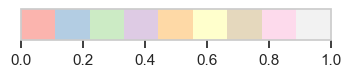

Pastel2


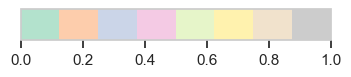

Set1


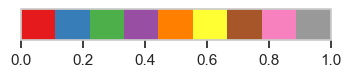

Set2


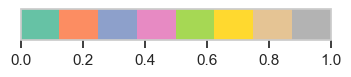

Set3


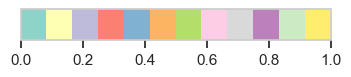

tab10


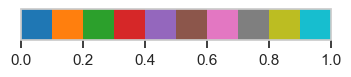

tab20


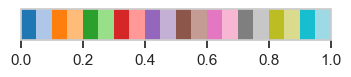

tab20b


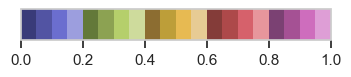

tab20c


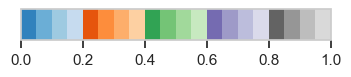

grey


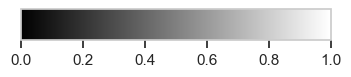

gist_grey


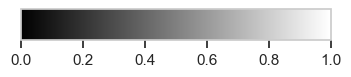

gist_yerg


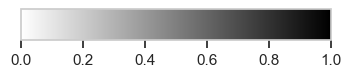

Grays


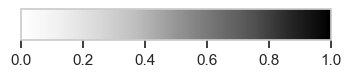

magma_r


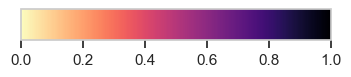

inferno_r


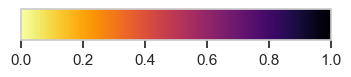

plasma_r


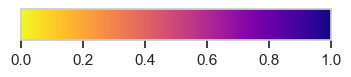

viridis_r


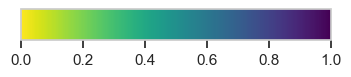

cividis_r


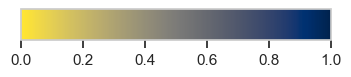

twilight_r


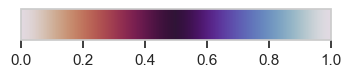

twilight_shifted_r


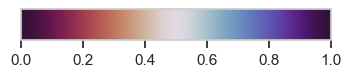

turbo_r


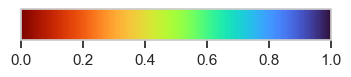

Blues_r


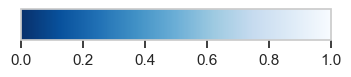

BrBG_r


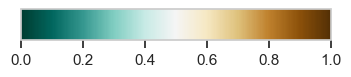

BuGn_r


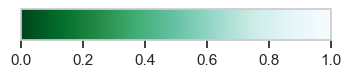

BuPu_r


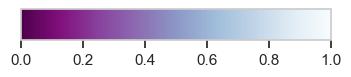

CMRmap_r


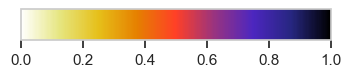

GnBu_r


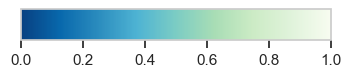

Greens_r


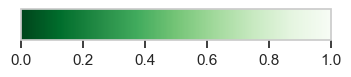

Greys_r


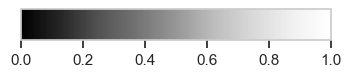

OrRd_r


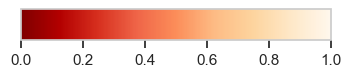

Oranges_r


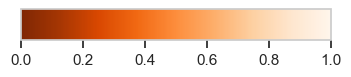

PRGn_r


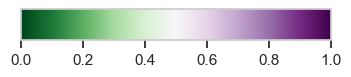

PiYG_r


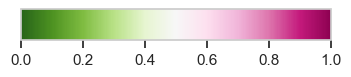

PuBu_r


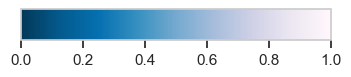

PuBuGn_r


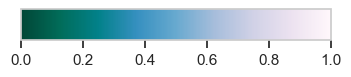

PuOr_r


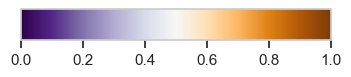

PuRd_r


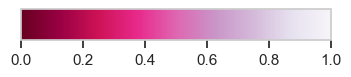

Purples_r


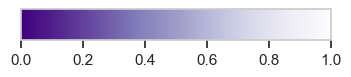

RdBu_r


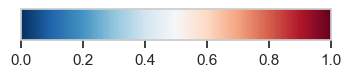

RdGy_r


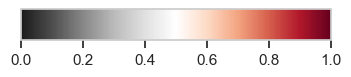

RdPu_r


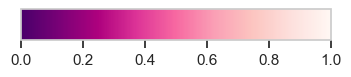

RdYlBu_r


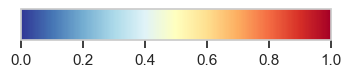

RdYlGn_r


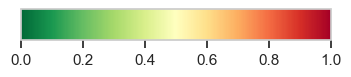

Reds_r


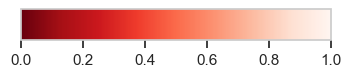

Spectral_r


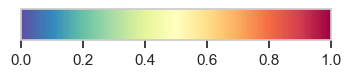

Wistia_r


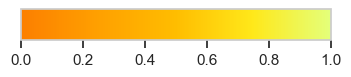

YlGn_r


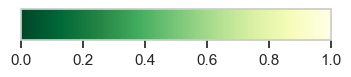

YlGnBu_r


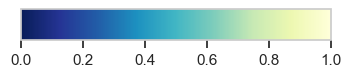

YlOrBr_r


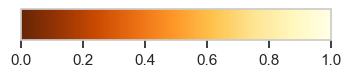

YlOrRd_r


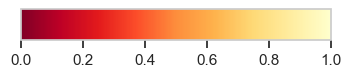

afmhot_r


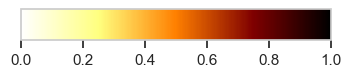

autumn_r


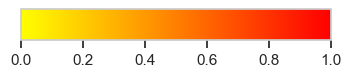

binary_r


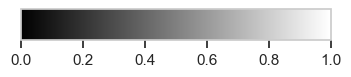

bone_r


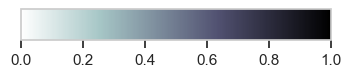

brg_r


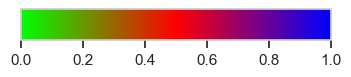

bwr_r


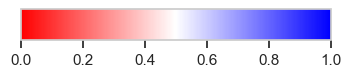

cool_r


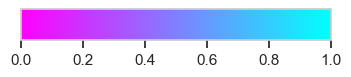

coolwarm_r


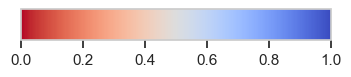

copper_r


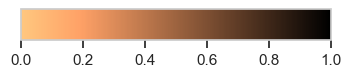

cubehelix_r


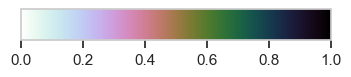

flag_r


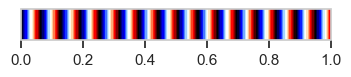

gist_earth_r


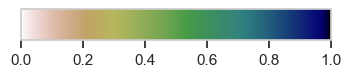

gist_gray_r


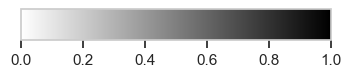

gist_heat_r


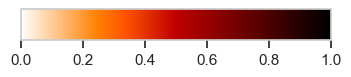

gist_ncar_r


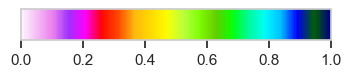

gist_rainbow_r


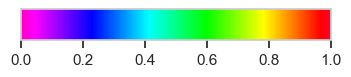

gist_stern_r


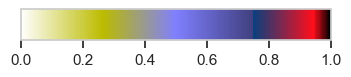

gist_yarg_r


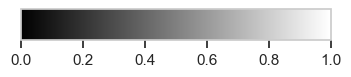

gnuplot_r


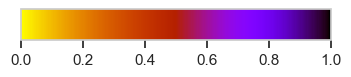

gnuplot2_r


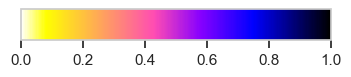

gray_r


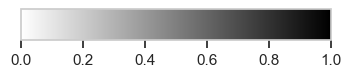

hot_r


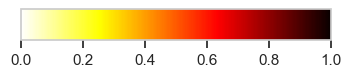

hsv_r


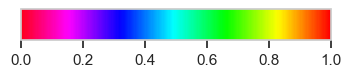

jet_r


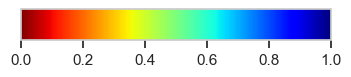

nipy_spectral_r


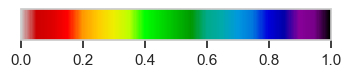

ocean_r


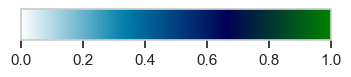

pink_r


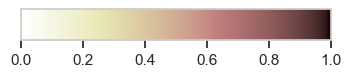

prism_r


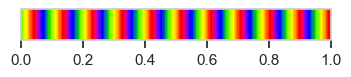

rainbow_r


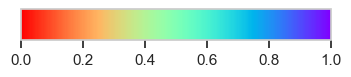

seismic_r


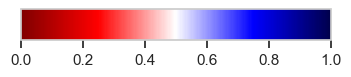

spring_r


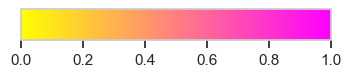

summer_r


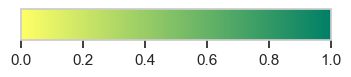

terrain_r


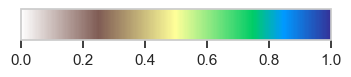

winter_r


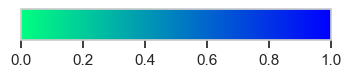

Accent_r


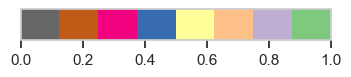

Dark2_r


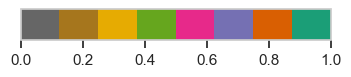

Paired_r


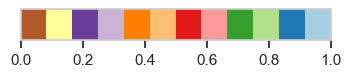

Pastel1_r


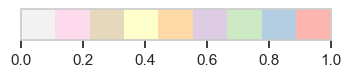

Pastel2_r


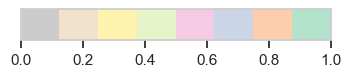

Set1_r


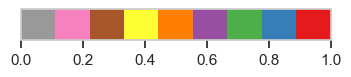

Set2_r


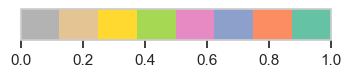

Set3_r


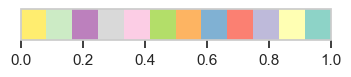

tab10_r


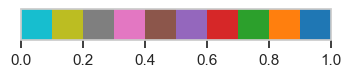

tab20_r


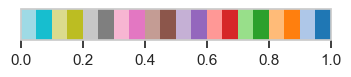

tab20b_r


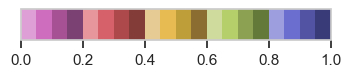

tab20c_r


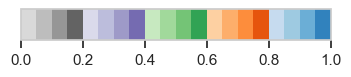

rocket


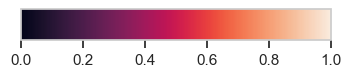

rocket_r


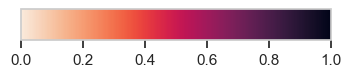

mako


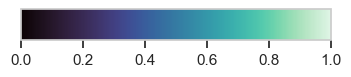

mako_r


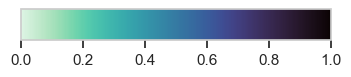

icefire


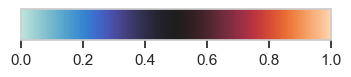

icefire_r


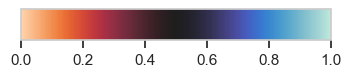

vlag


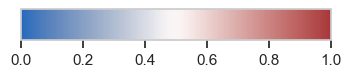

vlag_r


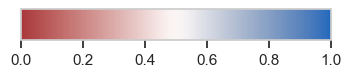

flare


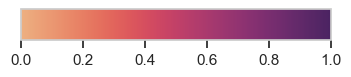

flare_r


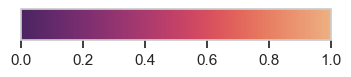

crest


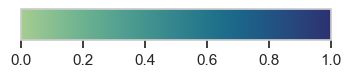

crest_r


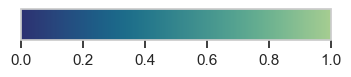

In [104]:
def plot_colorMaps(cmap):

    fig, ax = plt.subplots(figsize=(4,0.4))
    col_map = plt.get_cmap(cmap)
    matplotlib.colorbar.ColorbarBase(ax, cmap=col_map, orientation = 'horizontal')

    plt.show()

for cmap_id in plt.colormaps():
    print(cmap_id)
    plot_colorMaps(cmap_id)

# Definición del usuario base

## EMA

In [220]:
# encuestas
encuestas = pd.read_csv(r"Z:\AMIM\Alejandro\Docs\INFORME MOV\6. MIBICI\EMA\Encuesta_MiBici_2023_Todas_Las_Respuestas_Individuales_240131\CSV\Encuesta MiBici 2023.csv")
encuestas_muestra = pd.read_excel(r"Z:\AMIM\Alejandro\Docs\INFORME MOV\6. MIBICI\EMA\Encuesta_Muestra_Representativa_v1_240627.xlsx")

In [14]:
# Verificar columnas del DF, para ver columnas a sumar, y columnas a recalcular

# Asegúrate de que pandas muestre todas las columnas y expanda el ancho de la visualización
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
#pd.set_option('display.max_colwidth', None)  # No limite el ancho de las columnas
pd.set_option('display.expand_frame_repr', False)  # Evita el corte de DataFrames grandes

#columnas

### grupo de edad

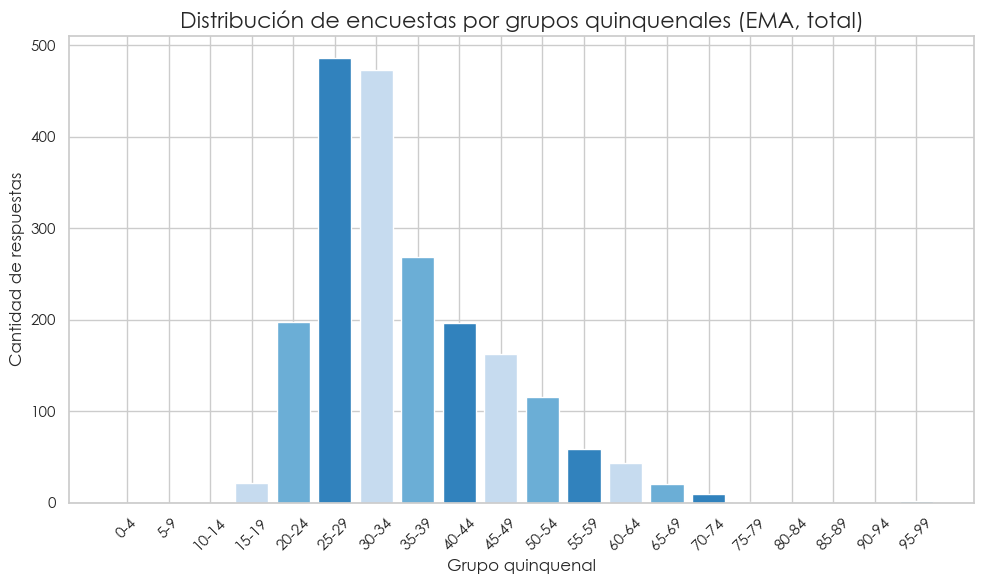

In [234]:
# Eliminar la fila con id 0
encuestas = encuestas.drop(index=0, errors='ignore')

# Convertir la columna de edad a numérica
encuestas['¿Cuál es tu edad?'] = pd.to_numeric(encuestas['¿Cuál es tu edad?'], errors='coerce')

# Crear una nueva columna con los grupos quinquenales
encuestas['GRUP_QUIN'] = pd.cut(
    encuestas['¿Cuál es tu edad?'], 
    bins=range(0, 101, 5),  # Rango de 0 a 100 con intervalos de 5
    right=False,           # Intervalos abiertos a la derecha (e.g., [0-5))
    labels=[f"{i}-{i+4}" for i in range(0, 100, 5)]  # Etiquetas como '0-4', '5-9', etc.
)




# Contar la cantidad de encuestas por grupo quinquenal
grupo_counts = encuestas['GRUP_QUIN'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(
    grupo_counts.index, 
    grupo_counts.values, 
    color=colors)

# Personalizar el gráfico
plt.title("Distribución de encuestas por grupos quinquenales (EMA, total)", fontsize=16)
plt.xlabel("Grupo quinquenal", fontsize=12)
plt.ylabel("Cantidad de respuestas", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


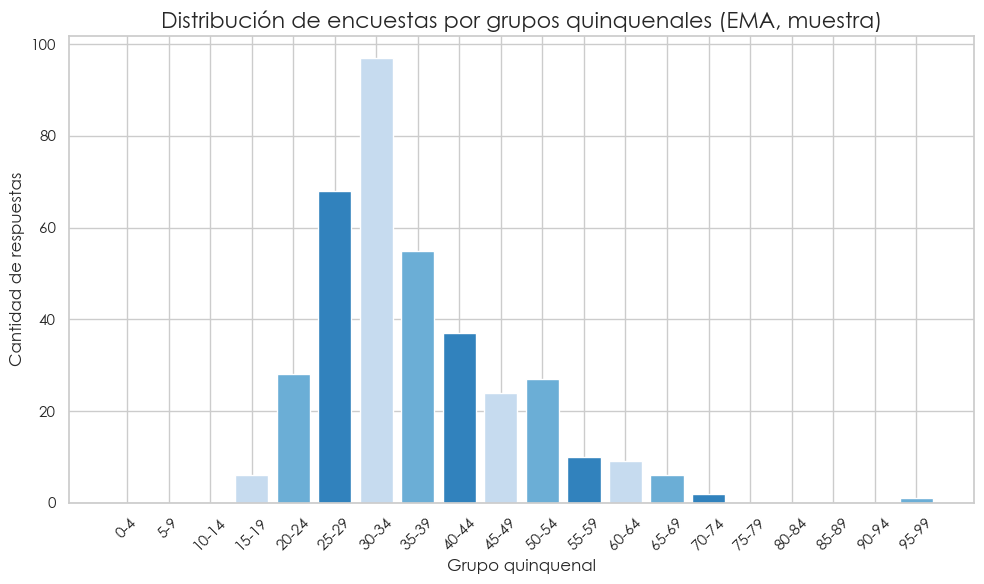

In [293]:
# Eliminar la fila con id 0
encuestas_muestra = encuestas_muestra.drop(index=0, errors='ignore')

# Convertir la columna de edad a numérica
encuestas_muestra['¿Cuál es tu edad?'] = pd.to_numeric(encuestas_muestra['¿Cuál es tu edad?'], errors='coerce')

# Crear una nueva columna con los grupos quinquenales
encuestas_muestra['GRUP_QUIN'] = pd.cut(
    encuestas_muestra['¿Cuál es tu edad?'], 
    bins=range(0, 101, 5),  # Rango de 0 a 100 con intervalos de 5
    right=False,           # Intervalos abiertos a la derecha (e.g., [0-5))
    labels=[f"{i}-{i+4}" for i in range(0, 100, 5)]  # Etiquetas como '0-4', '5-9', etc.
)




# Contar la cantidad de encuestas por grupo quinquenal
grupo_counts = encuestas_muestra['GRUP_QUIN'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(
    grupo_counts.index, 
    grupo_counts.values, 
    color=colors)

# Personalizar el gráfico
plt.title("Distribución de encuestas por grupos quinquenales (EMA, muestra)", fontsize=16)
plt.xlabel("Grupo quinquenal", fontsize=12)
plt.ylabel("Cantidad de respuestas", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### Ingresos mensuales

C:\Users\AMIM GTAC\AppData\Local\Temp\ipykernel_20956\537891447.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  encuestas.groupby(['GRUP_QUIN', 'Ingreso Agrupado'])


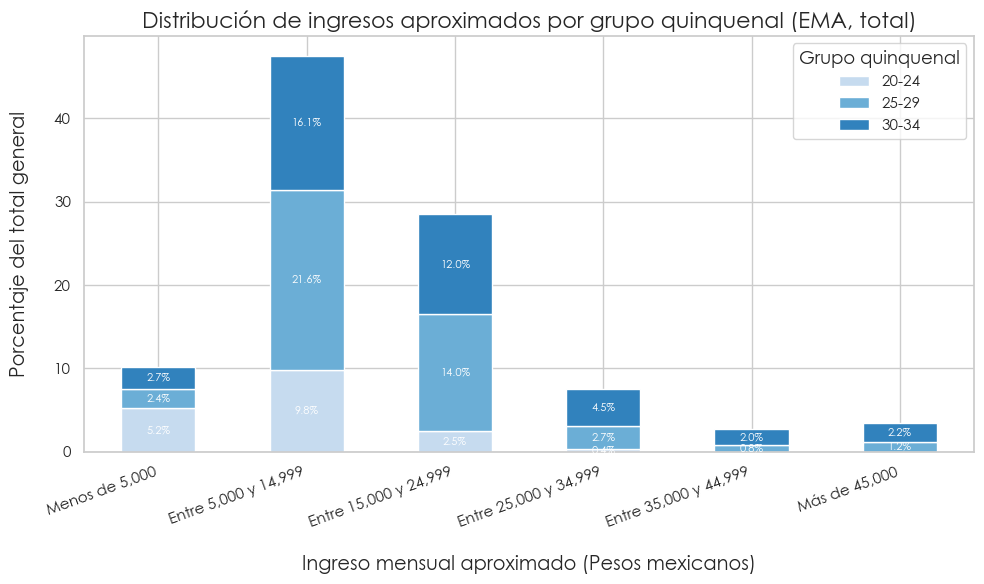

In [250]:
# Normalizar los nombres de las categorías de ingreso
encuestas['¿Cuál es tu ingreso mensual aproximado? (personal)Pesos mexicanos'] = (
    encuestas['¿Cuál es tu ingreso mensual aproximado? (personal)Pesos mexicanos']
    .str.replace('$', '', regex=False)  # Quitar el símbolo de $
    .str.strip()  # Eliminar espacios adicionales
)

# Mapeo para agrupar y ordenar las categorías de ingreso
mapa_ingresos = {
    'Menos de 5,000': 'Menos de 5,000',
    'Entre 5,000 y 14,999': 'Entre 5,000 y 14,999',
    'Entre 15,000 y 24,999': 'Entre 15,000 y 24,999',
    'Entre 25,000 y 34,999': 'Entre 25,000 y 34,999',
    'Entre 35,000 y 44,999': 'Entre 35,000 y 44,999',
    'Entre 45,000 y 59,999': 'Más de 45,000',
    'Entre 60,000 y 74,999': 'Más de 45,000',
    'Entre 75,000 y 99,000': 'Más de 45,000',
    'Más de 99,000': 'Más de 45,000',
    'Prefiero no responder': 'Prefiero no responder'
}

# Aplicar el mapeo
encuestas['Ingreso Agrupado'] = encuestas['¿Cuál es tu ingreso mensual aproximado? (personal)Pesos mexicanos'].map(mapa_ingresos)

# Ordenar las categorías de forma ascendente
orden_ingresos = [
    'Menos de 5,000',
    'Entre 5,000 y 14,999',
    'Entre 15,000 y 24,999',
    'Entre 25,000 y 34,999',
    'Entre 35,000 y 44,999',
    'Más de 45,000'
]

encuestas['Ingreso Agrupado'] = pd.Categorical(
    encuestas['Ingreso Agrupado'], 
    categories=orden_ingresos, 
    ordered=True
)

#1 Agrupar por quinquenios e ingresos, y contar la frecuencia
frecuencias_ingresos = (
    encuestas.groupby(['GRUP_QUIN', 'Ingreso Agrupado'])
    .size()
    .unstack(fill_value=0)
)

# 2. Filtrar filas correspondientes a los grupos quinquenales de interés
grupos_objetivo = ['20-24', '25-29', '30-34']
frecuencias_ingresos = frecuencias_ingresos.loc[grupos_objetivo]

# Calcular el total general de personas en los grupos quinquenales seleccionados
total_general = frecuencias_ingresos.sum().sum()

# Calcular los porcentajes relativos al total general
porcentajes_ingresos = (frecuencias_ingresos / total_general) * 100

# Configurar estilo de gráfico
ax=porcentajes_ingresos.T.plot(kind='bar', figsize=(10, 6), stacked=True, color=colors)

# Añadir etiquetas a las barras
for container in ax.containers:
    for bar in container:
        # Obtener la altura de cada barra
        height = bar.get_height()
        if height > 0:  # Solo etiquetar barras con valores positivos
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Posición x centrada
                bar.get_y() + height / 2,          # Posición y centrada
                f'{height:.1f}%',                  # Etiqueta con formato
                ha='center', va='center',         # Centrar etiqueta
                fontsize=8, color='white'        # Personalización del texto
            )

plt.title('Distribución de ingresos aproximados por grupo quinquenal (EMA, total)', fontsize=16)
plt.xlabel('Ingreso mensual aproximado (Pesos mexicanos)', labelpad = 18, fontsize=14)
plt.ylabel('Porcentaje del total general', labelpad = 18, fontsize=14)
plt.legend(title='Grupo quinquenal', title_fontsize=13)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()

# Mostrar la gráfica
plt.show()


C:\Users\AMIM GTAC\AppData\Local\Temp\ipykernel_20956\3608304094.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  encuestas_muestra.groupby(['GRUP_QUIN', 'Ingreso Agrupado'])


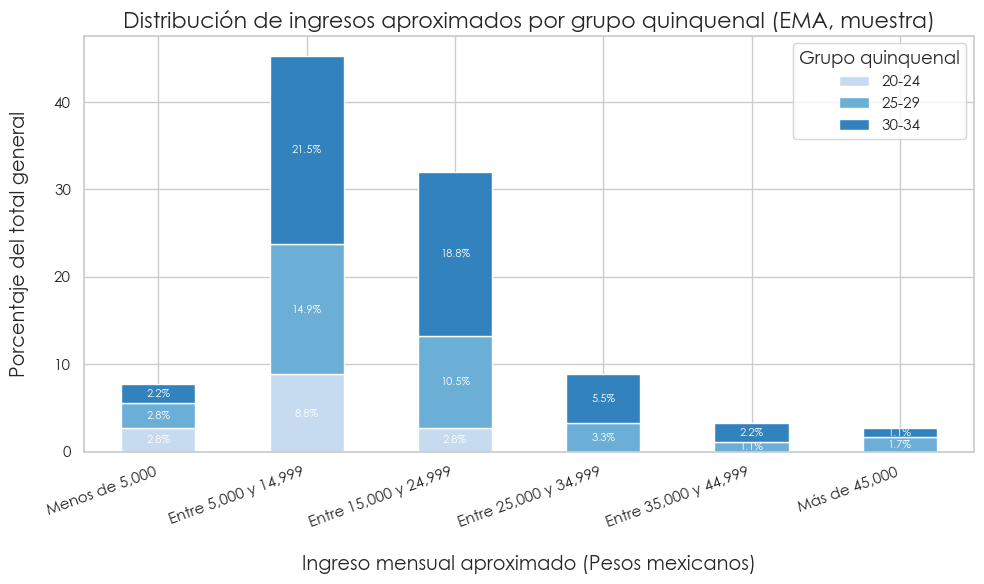

In [252]:
# Normalizar los nombres de las categorías de ingreso
encuestas_muestra['¿Cuál es tu ingreso mensual aproximado? (personal)Pesos mexicanos'] = (
    encuestas_muestra['¿Cuál es tu ingreso mensual aproximado? (personal)Pesos mexicanos']
    .str.replace('$', '', regex=False)  # Quitar el símbolo de $
    .str.strip()  # Eliminar espacios adicionales
)

# Mapeo para agrupar y ordenar las categorías de ingreso
mapa_ingresos = {
    'Menos de 5,000': 'Menos de 5,000',
    'Entre 5,000 y 14,999': 'Entre 5,000 y 14,999',
    'Entre 15,000 y 24,999': 'Entre 15,000 y 24,999',
    'Entre 25,000 y 34,999': 'Entre 25,000 y 34,999',
    'Entre 35,000 y 44,999': 'Entre 35,000 y 44,999',
    'Entre 45,000 y 59,999': 'Más de 45,000',
    'Entre 60,000 y 74,999': 'Más de 45,000',
    'Entre 75,000 y 99,000': 'Más de 45,000',
    'Más de 99,000': 'Más de 45,000',
    'Prefiero no responder': 'Prefiero no responder'
}

# Aplicar el mapeo
encuestas_muestra['Ingreso Agrupado'] = encuestas_muestra['¿Cuál es tu ingreso mensual aproximado? (personal)Pesos mexicanos'].map(mapa_ingresos)

# Ordenar las categorías de forma ascendente
orden_ingresos = [
    'Menos de 5,000',
    'Entre 5,000 y 14,999',
    'Entre 15,000 y 24,999',
    'Entre 25,000 y 34,999',
    'Entre 35,000 y 44,999',
    'Más de 45,000'
]

encuestas_muestra['Ingreso Agrupado'] = pd.Categorical(
    encuestas_muestra['Ingreso Agrupado'], 
    categories=orden_ingresos, 
    ordered=True
)

#1 Agrupar por quinquenios e ingresos, y contar la frecuencia
frecuencias_ingresos = (
    encuestas_muestra.groupby(['GRUP_QUIN', 'Ingreso Agrupado'])
    .size()
    .unstack(fill_value=0)
)

# 2. Filtrar filas correspondientes a los grupos quinquenales de interés
grupos_objetivo = ['20-24', '25-29', '30-34']
frecuencias_ingresos = frecuencias_ingresos.loc[grupos_objetivo]

# Calcular el total general de personas en los grupos quinquenales seleccionados
total_general = frecuencias_ingresos.sum().sum()

# Calcular los porcentajes relativos al total general
porcentajes_ingresos = (frecuencias_ingresos / total_general) * 100

# Configurar estilo de gráfico
ax=porcentajes_ingresos.T.plot(kind='bar', figsize=(10, 6), stacked=True, color=colors)

# Añadir etiquetas a las barras
for container in ax.containers:
    for bar in container:
        # Obtener la altura de cada barra
        height = bar.get_height()
        if height > 0:  # Solo etiquetar barras con valores positivos
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Posición x centrada
                bar.get_y() + height / 2,          # Posición y centrada
                f'{height:.1f}%',                  # Etiqueta con formato
                ha='center', va='center',         # Centrar etiqueta
                fontsize=8, color='white'        # Personalización del texto
            )

plt.title('Distribución de ingresos aproximados por grupo quinquenal (EMA, muestra)', fontsize=16)
plt.xlabel('Ingreso mensual aproximado (Pesos mexicanos)', labelpad = 18, fontsize=14)
plt.ylabel('Porcentaje del total general', labelpad = 18, fontsize=14)
plt.legend(title='Grupo quinquenal', title_fontsize=13)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()

# Mostrar la gráfica
plt.show()


## EMCA

In [244]:
# Configuración inicial
excel_file = r"Z:\AMIM\Alejandro\Docs\INFORME MOV\5. EMCA\Encuestas\CIC_2023_limpio.xlsx"

# Leer archivo Excel y extraer las columnas necesarias
emca = pd.read_excel(excel_file)

### grupo de edad

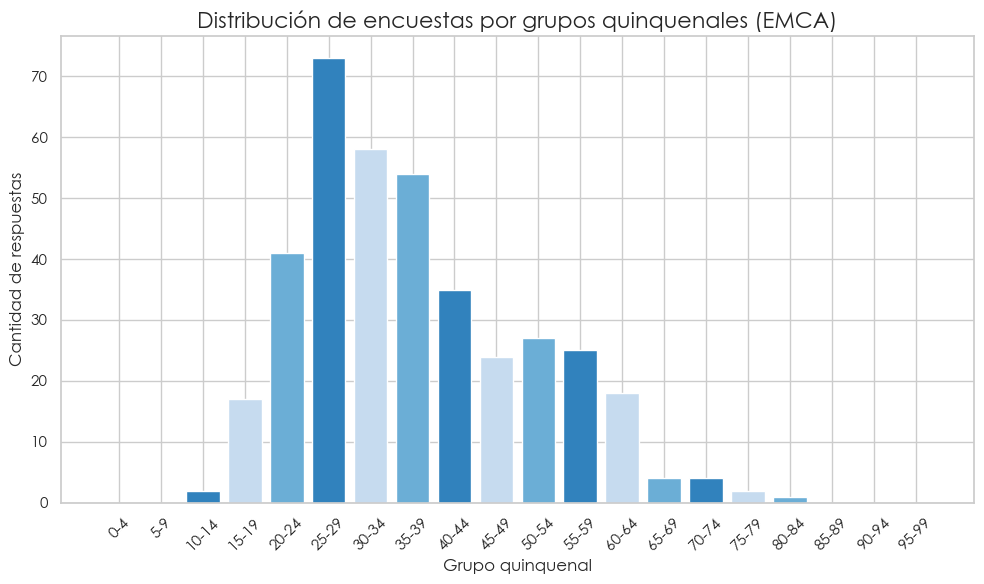

In [246]:
# # Convertir la columna de edad a numérica
# emca['¿Cuál es tu edad?'] = pd.to_numeric(emca['¿Cuál es tu edad?'], errors='coerce')

# Crear una nueva columna con los grupos quinquenales
emca['GRUP_QUIN'] = pd.cut(
    emca['Q6'], 
    bins=range(0, 101, 5),  # Rango de 0 a 100 con intervalos de 5
    right=False,           # Intervalos abiertos a la derecha (e.g., [0-5))
    labels=[f"{i}-{i+4}" for i in range(0, 100, 5)]  # Etiquetas como '0-4', '5-9', etc.
)


# Contar la cantidad de encuestas por grupo quinquenal
grupo_counts = emca['GRUP_QUIN'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(
    grupo_counts.index, 
    grupo_counts.values, 
    color=colors)

# Personalizar el gráfico
plt.title("Distribución de encuestas por grupos quinquenales (EMCA)", fontsize=16)
plt.xlabel("Grupo quinquenal", fontsize=12)
plt.ylabel("Cantidad de respuestas", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Ingresos mensuales

C:\Users\AMIM GTAC\AppData\Local\Temp\ipykernel_20956\253783015.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emca.groupby(['GRUP_QUIN', 'Ingreso Agrupado'])


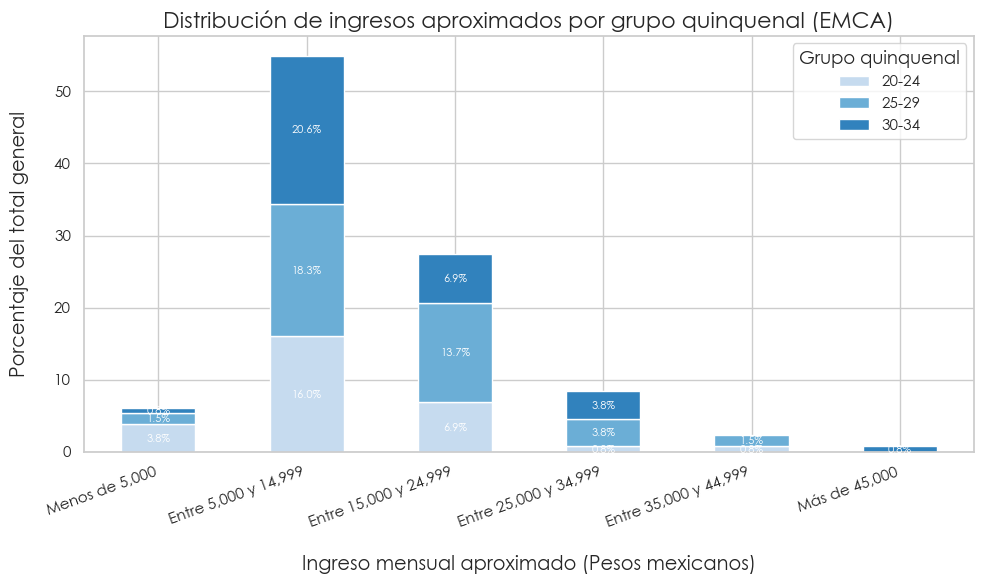

In [260]:
# Normalizar los nombres de las categorías de ingreso
emca['Q11'] = (
    emca['Q11']
    .str.replace('$', '', regex=False)  # Quitar el símbolo de $
    .str.strip()  # Eliminar espacios adicionales
)

# Mapeo para agrupar y ordenar las categorías de ingreso
mapa_ingresos = {
    'Menos de 5,000': 'Menos de 5,000',
    'Entre 5,000 y 14,999': 'Entre 5,000 y 14,999',
    'Entre 15,000 y 24,999': 'Entre 15,000 y 24,999',
    'Entre 25,000 y 34,999': 'Entre 25,000 y 34,999',
    'Entre 35,000 y 44,999': 'Entre 35,000 y 44,999',
    'Entre 45,000 y 59,999': 'Más de 45,000',
    'Entre 60,000 y 74,999': 'Más de 45,000',
    'Entre 75,000 y 99,000': 'Más de 45,000',
    'Más de 99,000': 'Más de 45,000',
    'Prefiero no responder': 'Prefiero no responder'
}

# Aplicar el mapeo
emca['Ingreso Agrupado'] = emca['Q11'].map(mapa_ingresos)

# Ordenar las categorías de forma ascendente
orden_ingresos = [
    'Menos de 5,000',
    'Entre 5,000 y 14,999',
    'Entre 15,000 y 24,999',
    'Entre 25,000 y 34,999',
    'Entre 35,000 y 44,999',
    'Más de 45,000'
]

emca['Ingreso Agrupado'] = pd.Categorical(
    emca['Ingreso Agrupado'], 
    categories=orden_ingresos, 
    ordered=True
)

#1 Agrupar por quinquenios e ingresos, y contar la frecuencia
frecuencias_ingresos = (
    emca.groupby(['GRUP_QUIN', 'Ingreso Agrupado'])
    .size()
    .unstack(fill_value=0)
)

# 2. Filtrar filas correspondientes a los grupos quinquenales de interés
grupos_objetivo = ['20-24', '25-29', '30-34']
frecuencias_ingresos = frecuencias_ingresos.loc[grupos_objetivo]

# Calcular el total general de personas en los grupos quinquenales seleccionados
total_general = frecuencias_ingresos.sum().sum()

# Calcular los porcentajes relativos al total general
porcentajes_ingresos = (frecuencias_ingresos / total_general) * 100

# Configurar estilo de gráfico
ax=porcentajes_ingresos.T.plot(kind='bar', figsize=(10, 6), stacked=True, color=colors)

# Añadir etiquetas a las barras
for container in ax.containers:
    for bar in container:
        # Obtener la altura de cada barra
        height = bar.get_height()
        if height > 0:  # Solo etiquetar barras con valores positivos
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Posición x centrada
                bar.get_y() + height / 2,          # Posición y centrada
                f'{height:.1f}%',                  # Etiqueta con formato
                ha='center', va='center',         # Centrar etiqueta
                fontsize=8, color='white'        # Personalización del texto
            )

plt.title('Distribución de ingresos aproximados por grupo quinquenal (EMCA)', fontsize=16)
plt.xlabel('Ingreso mensual aproximado (Pesos mexicanos)', labelpad = 18, fontsize=14)
plt.ylabel('Porcentaje del total general', labelpad = 18, fontsize=14)
plt.legend(title='Grupo quinquenal', title_fontsize=13)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()

# Mostrar la gráfica
plt.show()


# Demanda

## censo loc

In [265]:

#RUTAS ENTRADA - ALEJANDRO (SSD)
ITER_2020_ruta = r"Z:\VOCES\DATA\2020\ITER\ITER_NALCSV20.csv"
ITER_2010_ruta = r"Z:\VOCES\DATA\2010\ITER\ITER_NALDBF10.dbf"

# ruta shp base
SHP_LOC_NAC_ruta = r"Z:\VOCES\DATA\SHP\mg_2020_integrado\conjunto_de_datos\00l.shp"

#ruta gpkg fin
MAPA_TIPO_ruta = r"Z:\AMIM\Alejandro\Docs\MT\Loc_Censo.gpkg"

# Ruta del archivo shp de polígonos
polygons_path = r"Z:\VOCES\DATA\PCU_2018_SHP\PCUS_2018.shp"

#rutas claves metro
CVE_METRO_ruta = r"Z:\VOCES\DATA\Claves_Metro.csv"

#rutas denue
ruta_denue = r"Z:\VOCES\DATA\Tratados\NAC\DENUE.gpkg"

### base de datos

In [172]:
# PASO DOS - Preparación de información censal

# Función para cargar datos de archivo DBF y convertirlos a DataFrame
def load_dbf_to_dataframe(file_path):
    table = DBF(file_path)
    return pd.DataFrame(iter(table))

# Cargar archivos en un DataFrame
ITER_2020_df = pd.read_csv(ITER_2020_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
ITER_2010_df = load_dbf_to_dataframe(ITER_2010_ruta)

# Homologación de ID rural - CVEGEO
def homologate_rural_id(row):
    return f"{row['ENTIDAD']}{row['MUN']}{row['LOC']}"

ITER_2020_df['CVEGEO'] = ITER_2020_df.apply(homologate_rural_id, axis=1)
ITER_2010_df['CVEGEO'] = ITER_2010_df.apply(homologate_rural_id, axis=1)

# reemplazar * con 1
def replace(dataframe):
    return dataframe.replace('*', '1')

ITER_2020_df = replace(ITER_2020_df)
ITER_2010_df = replace(ITER_2010_df)


# Leer el archivo de polígonos
polygons_gdf = gpd.read_file(polygons_path)[['geometry', 'CALIF_CLAS']]

# Define el CRS proyectado que deseas utilizar
CRS_PROYECTADO = 'EPSG:6372' 

# Leer shp base y convertir a gpkg
SHP_LOC_gdf = gpd.read_file(SHP_LOC_NAC_ruta)

# Proyecta el GeoDataFrame a un CRS proyectado
SHP_LOC_gdf = SHP_LOC_gdf.to_crs(CRS_PROYECTADO)
polygons_gdf = polygons_gdf.to_crs(CRS_PROYECTADO)

# CREAR GPKG BASE DESDE gdf DE MANZANAS
SHP_LOC_gdf.to_file(MAPA_TIPO_ruta, layer='Mapa_Localidades', driver='GPKG')

# Leer gpkg base
MAPA_TIPO_gdf = gpd.read_file(MAPA_TIPO_ruta, layer='Mapa_Localidades')

# Filtrar entidades rurales que intersectan con los polígonos
MAPA_TIPO_gdf_INTERSECT = gpd.sjoin(MAPA_TIPO_gdf, polygons_gdf, how='left', predicate='intersects')

# Eliminar duplicados basados en el identificador de SHP_LOC_gdf
MAPA_TIPO_gdf_INTERSECT = MAPA_TIPO_gdf_INTERSECT.drop_duplicates(subset=SHP_LOC_gdf.columns.tolist())

# Guardar la capa concatenada en el GeoPackage base
MAPA_TIPO_gdf_INTERSECT.to_file(MAPA_TIPO_ruta, layer='Mapa_Localidades', driver='GPKG', overwrite=True)

C:\Users\AMIM GTAC\AppData\Local\Temp\ipykernel_8236\3084763110.py:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  ITER_2020_df = pd.read_csv(ITER_2020_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})


In [173]:
# Leer gpkg base
MAPA_TIPO_gdf = gpd.read_file(MAPA_TIPO_ruta, layer='Mapa_Localidades')

# Filtrar censos
ITER_2020_df_F = ITER_2020_df[['CVEGEO', 'POBTOT','P_20A24', 'P_20A24_F', 'P_20A24_M', 'P_25A29', 'P_25A29_F', 'P_25A29_M', 'P_30A34', 'P_30A34_F','P_30A34_M', 'VIVTOT', 'VIVPAR_DES']]
#ITER_2010_df_F = ITER_2010_df[['CVEGEO', 'POBTOT','P_20A24', 'P_20A24_F', 'P_20A24_M', 'P_25A29', 'P_25A29_F', 'P_25A29_M', 'P_30A34', 'P_30A34_F','P_30A34_M', 'VIVTOT', 'VIVPAR_DES']]

# Renombrar columnas de ITER_2020_df antes del merge para evitar conflictos
ITER_2020_df_renamed = ITER_2020_df_F.rename(columns={
    'POBTOT'    : 'POPTOT2020',
    'P_20A24'   :   'P_20A242020'   ,
    'P_20A24_F' : 'P_20A24_F2020' , 
    'P_20A24_M' : 'P_20A24_M2020' , 
    'P_25A29'   :   'P_25A292020'   , 
    'P_25A29_F' : 'P_25A29_F2020' , 
    'P_25A29_M' : 'P_25A29_M2020' , 
    'P_30A34'   :   'P_30A342020'   , 
    'P_30A34_F' : 'P_30A34_F2020' ,
    'P_30A34_M' : 'P_30A34_M2020' ,
    'VIVTOT'    : 'VIVTOT2020',
    'VIVPAR_DES': 'VIVPAR_DES2020'
})

# ITER_2020_df_renamed = ITER_2020_df_F.rename(columns={
#     'POBTOT': 'POPTOT2010',
#     'P_20A24'  :   'P_20A242010'   ,
#     'P_20A24_F': 'P_20A24_F2010' , 
#     'P_20A24_M': 'P_20A24_M2010' , 
#     'P_25A29'  :   'P_25A292010'   , 
#     'P_25A29_F': 'P_25A29_F2010' , 
#     'P_25A29_M': 'P_25A29_M2010' , 
#     'P_30A34'  :   'P_30A342010'   , 
#     'P_30A34_F': 'P_30A34_F2010' ,
#     'P_30A34_M': 'P_30A34_M2010' ,
#     'VIVTOT': 'VIVTOT2010',
#     'VIVPAR_DES': 'VIVPAR_DES2010'
# })

MAPA_TIPO_gdf['CVEGEO'] = MAPA_TIPO_gdf['CVEGEO'].astype(str)
ITER_2020_df_renamed['CVEGEO'] = ITER_2020_df_renamed['CVEGEO'].astype(str)
#ITER_2010_df_renamed['CVEGEO'] = ITER_2010_df_renamed['CVEGEO'].astype(str)

# Unir campos de los DataFrames al GeoPackage base por CVEGEO
MAPA_TIPO_gdf1 = MAPA_TIPO_gdf.merge(
    ITER_2020_df_renamed[['CVEGEO', 'POPTOT2020','P_20A242020','P_20A24_F2020' ,
                          'P_20A24_M2020' , 'P_25A292020','P_25A29_F2020' ,'P_25A29_M2020' , 
                          'P_30A342020' ,'P_30A34_F2020','P_30A34_M2020' ,
                          'VIVTOT2020','VIVPAR_DES2020']],
    on='CVEGEO', how='left')

# MAPA_TIPO_gdf2 = MAPA_TIPO_gdf1.merge(
#     ITER_2010_df_renamed[['CVEGEO', 'POPTOT2010','P_20A242010','P_20A24_F2010' ,
#                           'P_20A24_M2010' ,  'P_25A292010' ,'P_25A29_F2010' ,'P_25A29_M2010' ,
#                           'P_30A342010' ,'P_30A34_F2010' ,'P_30A34_M2010' ,
#                           'VIVTOT2010','VIVPAR_DES2010']],
#     on='CVEGEO', how='left')

# Reemplazar * con 1
def replace(dataframe):
    return dataframe.replace('*', '1')

# Limpiar *
MAPA_TIPO_gdf2_A = replace(MAPA_TIPO_gdf1)

# Reemplazar N/D
MAPA_TIPO_gdf2_B = MAPA_TIPO_gdf2_A.replace('N/D', np.nan)

# Actualizar valores sin información de "null" a 0
MAPA_TIPO_gdf2_C = MAPA_TIPO_gdf2_B.fillna(0)

# Convertir campos a enteros
fields_to_convert = [
    'POPTOT2020','P_20A242020','P_20A24_F2020' ,
    'P_20A24_M2020' , 'P_25A292020','P_25A29_F2020' ,'P_25A29_M2020' , 
    'P_30A342020' ,'P_30A34_F2020','P_30A34_M2020' ,
    'VIVTOT2020','VIVPAR_DES2020']
for field in fields_to_convert:
    MAPA_TIPO_gdf2_C[field] = MAPA_TIPO_gdf2_C[field].astype(int)

# # Reordenar columnas
# ordered_columns = [
#     'CVEGEO',  'POPTOT2020', 'P_20A242020', 
#     'P_20A24_F2020', 'P_20A24_M2020',
#     'P_25A292020', 'P_25A29_F2020',
#     'P_25A29_M2020', 'P_30A342020',
#     'P_30A34_F2020', 'P_30A34_M2020', 
#     'VIVTOT2020', 'VIVPAR_DES2020'
# ] + [col for col in MAPA_TIPO_gdf1.columns if col not in [
#     'CVEGEO',  'POPTOT2020', 'P_20A242020', 
#     'P_20A24_F2020', 'P_20A24_M2020',
#     'P_25A292020', 'P_25A29_F2020',
#     'P_25A29_M2020', 'P_30A342020',
#     'P_30A34_F2020', 'P_30A34_M2020', 
#     'VIVTOT2020', 'VIVPAR_DES2020'
# ]]


# MAPA_TIPO_gdf2_C = MAPA_TIPO_gdf2_C[ordered_columns]

# Guardar el GeoPackage base actualizado
MAPA_TIPO_gdf2_C.to_file(MAPA_TIPO_ruta, layer='BASE_DATOS_NAC_LOC', driver="GPKG")

In [174]:
# Leer gpkg base
MAPA_TIPO_gdf = gpd.read_file(MAPA_TIPO_ruta, layer='BASE_DATOS_NAC_LOC')

# Cargar la segunda capa del segundo GeoPackage (individualmente)
MAPA_TIPO_gdf2_C_FIL = MAPA_TIPO_gdf[MAPA_TIPO_gdf['CVE_ENT'] == '14']

# Guardar la capa filtrada del segundo GeoPackage
MAPA_TIPO_gdf2_C_FIL.to_file(MAPA_TIPO_ruta, layer='Mapa_Localidades_JAL', driver="GPKG")


In [175]:
#AGRUPAR Y ASIGNAR FILTRO Y PROM POR ZM

#Subir archivo con CVE_METRO
CVE_METRO_df = pd.read_csv(CVE_METRO_ruta, dtype={'CVE_MET': str, 'CVEMUN':str})

# Leer la capa existente del GeoPackage base
MAPA_TIPO_gdf = gpd.read_file(MAPA_TIPO_ruta, layer='Mapa_Localidades_JAL')

#Crear campo CVEMUN
def homologate_municipio_id(row):
    return f"{row['CVE_ENT']}{row['CVE_MUN']}"

MAPA_TIPO_gdf['CVEMUN'] = MAPA_TIPO_gdf.apply(homologate_municipio_id, axis=1)

#Añadir claves a GPKG
MAPA_TIPO_gdf = MAPA_TIPO_gdf.merge(CVE_METRO_df[['CVEMUN', 'CVE_MET', 'NOM_MET', 'TIPO_MET','TIPO_MUN','NOM_MUN']], on='CVEMUN', how='left')

# Guardar el GeoPackage base actualizado
MAPA_TIPO_gdf.to_file(MAPA_TIPO_ruta, layer= 'Mapa_Localidades_JAL', driver="GPKG")

### Obtencion de datos 

In [267]:
# --- 1. Agrupación de datos por municipio y cálculo de totales ---

# Lista de municipios de interés
municipios = ['002','039', '044', '051','070','097', '098', '101', '120', '124']

# Leer la capa existente del GeoPackage base
MAPA_TIPO_gdf = gpd.read_file(MAPA_TIPO_ruta, layer='Mapa_Localidades_JAL')

# Filtrar el DataFrame solo con los municipios de interés
AMG_gdf = MAPA_TIPO_gdf[MAPA_TIPO_gdf['CVE_MUN'].isin(municipios)]

# Seleccionar las columnas de interés (totales y por género)
columnas_interes = [
    'CVE_MUN',  'NOM_MUN','P_20A242020', 'P_25A292020', 'P_30A342020',
    'P_20A24_F2020', 'P_20A24_M2020', 'P_25A29_F2020', 'P_25A29_M2020',
    'P_30A34_F2020', 'P_30A34_M2020'
]

# Crear un DataFrame filtrado con las columnas necesarias
df_interes = AMG_gdf[columnas_interes].copy()

# Crear columna de total por grupo quinquenal (20-34 años)
df_interes['TOTAL_20A34'] = (
    df_interes['P_20A242020'] + df_interes['P_25A292020'] + df_interes['P_30A342020']
)

# Agrupar por 'CVE_MUN' y sumar solo las columnas numéricas
tabla_totales = df_interes.groupby('CVE_MUN', as_index=False).sum(numeric_only=True)

# # Conservar 'NOM_MUN' usando el primer valor no nulo en cada grupo
tabla_totales['NOM_MUN'] = df_interes.groupby('CVE_MUN')['NOM_MUN'].first().reset_index(drop=True)

# Agregar fila de total general
fila_total = tabla_totales.drop(columns='CVE_MUN').sum(numeric_only=True)
fila_total['CVE_MUN'] = 'TOTAL'
tabla_totales = pd.concat([tabla_totales, pd.DataFrame([fila_total])], ignore_index=True)

# Mostrar la tabla resultante
print("Tabla de Totales por Municipio y Grupo Quinquenal:")
tabla_totales

Tabla de Totales por Municipio y Grupo Quinquenal:


,CVE_MUN,P_20A242020,P_25A292020,P_30A342020,P_20A24_F2020,P_20A24_M2020,P_25A29_F2020,P_25A29_M2020,P_30A34_F2020,P_30A34_M2020,TOTAL_20A34,NOM_MUN
0,002,1954,1830,1658,989,967,917,915,831,829,5442,None
1,039,117796,113418,104873,58533,59263,56127,57291,52446,52427,336087,Guadalajara
2,044,5555,5236,5283,2803,2752,2749,2487,2791,2492,16074,None
3,051,2480,2786,2791,1307,1173,1474,1312,1405,1386,8057,Juanacatlán
4,070,21546,21163,19140,10176,11370,9572,11591,8530,10610,61849,El Salto
5,097,60174,58046,61246,30719,29455,30055,27991,31730,29516,179466,Tlajomulco de Zúñiga
6,098,60688,56167,53043,30197,30492,27911,28257,26891,26153,169898,San Pedro Tlaquepaque
7,101,50526,46660,44981,25402,25124,23914,22746,23065,21916,142167,Tonalá
8,120,129622,125962,117451,64605,65017,63273,62689,59689,57762,373035,Zapopan
9,124,4556,4255,4020,2293,2263,2169,2086,2085,1935,12831,None


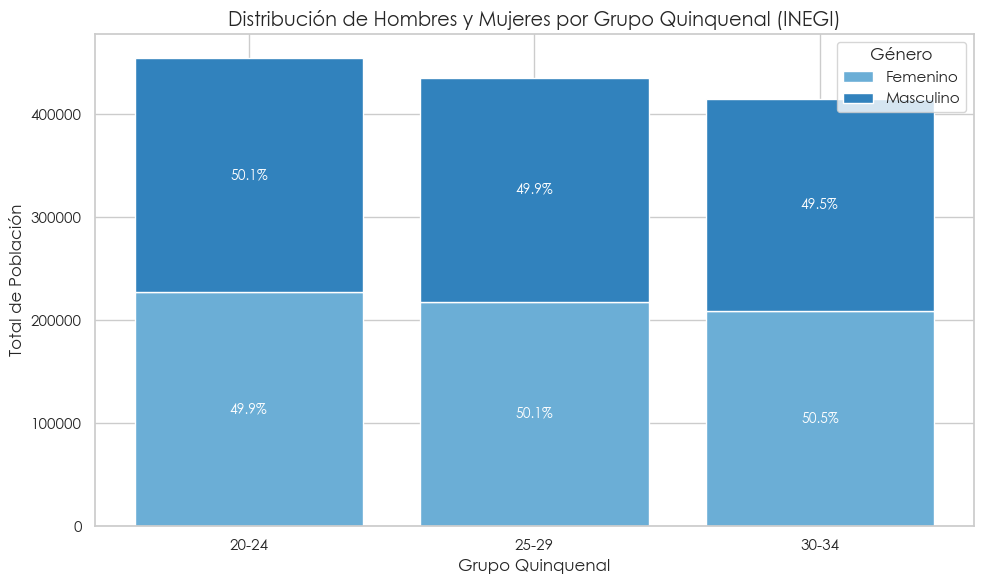

In [285]:
# --- Datos de entrada ---
grupos_quinquenales = ['P_20A242020', 'P_25A292020', 'P_30A342020']
grupos_femenino = ['P_20A24_F2020', 'P_25A29_F2020', 'P_30A34_F2020']
grupos_masculino = ['P_20A24_M2020', 'P_25A29_M2020', 'P_30A34_M2020']

# Calcular totales por género para cada grupo quinquenal
data_genero = pd.DataFrame({
    'Grupo Quinquenal': ['20-24', '25-29', '30-34'],
    'Femenino': [df_interes[col].sum() for col in grupos_femenino],
    'Masculino': [df_interes[col].sum() for col in grupos_masculino],
})

# Calcular porcentajes
data_genero['Total'] = data_genero['Femenino'] + data_genero['Masculino']
data_genero['% Femenino'] = (data_genero['Femenino'] / data_genero['Total'] * 100).round(1)
data_genero['% Masculino'] = (data_genero['Masculino'] / data_genero['Total'] * 100).round(1)

# --- Crear la gráfica ---
fig, ax = plt.subplots(figsize=(10, 6))

# Barras apiladas
bar_fem = ax.bar(data_genero['Grupo Quinquenal'], data_genero['Femenino'], 
                label='Femenino', color=colors[1])
bar_masc = ax.bar(data_genero['Grupo Quinquenal'], data_genero['Masculino'], 
                  bottom=data_genero['Femenino'], label='Masculino', color=colors[2])

# Agregar etiquetas con porcentajes
for i, (fem, masc) in enumerate(zip(bar_fem, bar_masc)):
    # Etiqueta Femenino
    ax.text(fem.get_x() + fem.get_width() / 2, fem.get_height() / 2,
            f"{data_genero['% Femenino'][i]}%", ha='center', va='center', color='white', fontsize=10)
    # Etiqueta Masculino
    ax.text(masc.get_x() + masc.get_width() / 2, fem.get_height() + masc.get_height() / 2,
            f"{data_genero['% Masculino'][i]}%", ha='center', va='center', color='white', fontsize=10)

# Personalización
ax.set_title('Distribución de Hombres y Mujeres por Grupo Quinquenal (INEGI)', fontsize=14)
ax.set_xlabel('Grupo Quinquenal', fontsize=12)
ax.set_ylabel('Total de Población', fontsize=12)
ax.legend(title='Género', loc='upper right')

# Ajustar apariencia
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## censo mzn

In [13]:
# RUTAS ENTRADA - ALEJANDRO (SSD)

#RUTAS CENSOS
MZNA_2020_ruta = r"Z:\VOCES\DATA\Tratados\NAC\MZNA_2020_NAC.csv"
ITER_2020_ruta = r"Z:\VOCES\DATA\Tratados\NAC\ITER_2020_NAC.csv"
MZNA_2010_ruta = r"Z:\VOCES\DATA\Tratados\NAC\MZNA_2010_NAC.csv"
ITER_2010_ruta = r"Z:\VOCES\DATA\Tratados\NAC\ITER_2010_NAC.csv"

# ruta shp base
SHP_LOC_NAC_ruta = r"Z:\VOCES\DATA\SHP\NAC\00l.shp"
SHP_MZN_NAC_ruta = r"Z:\VOCES\DATA\Tratados\NAC\MZNyLOC_NAC.gpkg"

#ruta gpkg fin
MAPA_TIPO_ruta = r"Z:\AMIM\Alejandro\Docs\MT\Mzn_Censo.gpkg"

# Ruta del archivo shp de polígonos de contención urbana
polygons_path = r"Z:\VOCES\DATA\PCU_2018_SHP\PCUS_2018.shp"

#CLAVES METRO
CVE_METRO_ruta = r"Z:\VOCES\DATA\Claves_Metro.csv"

#Claves denue
DENUE_ruta = r"Z:\VOCES\DATA\Tratados\NAC\DENUE.gpkg"

#rutas (ALEJANDRO - SSD)
equipamientos_gpkg = r"Z:\VOCES\DATA\Tratados\NAC\EQUIPAMIENTOS\Equipamientos_NAC_2020.gpkg"

Censo_Urbn_ruta = r"Z:\AMIM\Alejandro\Docs\DATA\Censos\Censo2020_CEU_jal_csv\TI_MANZANA_EU_14.csv"

### tratamiento base datos

In [15]:
##########CREAR GPKG BASE

# Leer el archivo de polígonos
polygons_gdf = gpd.read_file(polygons_path)[['geometry', 'CALIF_CLAS']]

# Define el CRS proyectado que deseas utilizar
CRS_PROYECTADO = 'EPSG:6372' 

# Leer shp base
SHP_MZN_gdf= gpd.read_file(SHP_MZN_NAC_ruta, layer='MZN')
SHP_LOC_gdf = gpd.read_file(SHP_LOC_NAC_ruta)

# Proyecta el GeoDataFrame a un CRS proyectado
SHP_MZN_gdf = SHP_MZN_gdf.to_crs(CRS_PROYECTADO)
SHP_LOC_gdf = SHP_LOC_gdf.to_crs(CRS_PROYECTADO)
polygons_gdf = polygons_gdf.to_crs(CRS_PROYECTADO)

# Selección de ITER rural
SHP_LOC_gdf_RURAL = SHP_LOC_gdf[SHP_LOC_gdf['AMBITO'] == 'Rural']

# Filtrar entidades rurales que intersectan con los polígonos
SHP_LOC_gdf_RURAL_INTERSECT = gpd.sjoin(SHP_LOC_gdf_RURAL, polygons_gdf, how='inner', predicate='intersects')

# Concatenar ITER rural a la capa existente
gdf_concatenated = gpd.GeoDataFrame(pd.concat([SHP_MZN_gdf, SHP_LOC_gdf_RURAL_INTERSECT], ignore_index=True))

# Guardar la capa concatenada en el GeoPackage base
gdf_concatenated.to_file(MAPA_TIPO_ruta, layer='Mapa_MT', driver='GPKG')

In [16]:
# Leer gpkg base
MAPA_TIPO_gdf = gpd.read_file(MAPA_TIPO_ruta, layer='Mapa_MT')

# LEER INFORMACIÓN CENSAL
MZNA_2020_df = pd.read_csv(MZNA_2020_ruta, dtype=str)
ITER_2020_df = pd.read_csv(ITER_2020_ruta, dtype=str)
MZNA_2010_df = pd.read_csv(MZNA_2010_ruta, dtype=str)
ITER_2010_df = pd.read_csv(ITER_2010_ruta, dtype=str)

# Filtrar censos
MZNA_2020_df_F = MZNA_2020_df[['CVEGEO', 'POBTOT', 'VIVTOT', 'P_18YMAS', 'P_18YMAS_F', 'P_18YMAS_M', 'P_60YMAS', 'P_60YMAS_F', 'P_60YMAS_M', 'VIVPAR_DES', 'PEA', 'PE_INAC', 'POCUPADA', 'PDESOCUP', 'VPH_AUTOM', 'VPH_MOTO', 'VPH_BICI']]
ITER_2020_df_F = ITER_2020_df[['CVEGEO', 'POBTOT', 'VIVTOT', 'P_18YMAS', 'P_18YMAS_F', 'P_18YMAS_M', 'P_60YMAS', 'P_60YMAS_F', 'P_60YMAS_M', 'VIVPAR_DES', 'PEA', 'PE_INAC', 'POCUPADA', 'PDESOCUP', 'VPH_AUTOM', 'VPH_MOTO', 'VPH_BICI']]
# Renombrar columnas de ITER_2020_df antes del merge para evitar conflictos

# Crear un diccionario base con las columnas seleccionadas
columnas_seleccionadas = {
    'POBTOT': 'POBTOT',
    'VIVTOT': 'VIVTOT',
    'VIVPAR_DES': 'VIVPAR_DES',
    'PEA': 'PEA',
    'PE_INAC': 'PE_INAC',
    'POCUPADA': 'POCUPADA',
    'PDESOCUP': 'PDESOCUP',
    'VPH_AUTOM': 'VPH_AUTOM',
    'VPH_MOTO': 'VPH_MOTO',
    'VPH_BICI': 'VPH_BICI',
    'P_18YMAS': 'P_18YMAS',
    'P_18YMAS_F': 'P_18YMAS_F',
    'P_18YMAS_M': 'P_18YMAS_M',
    'P_60YMAS': 'P_60YMAS',
    'P_60YMAS_F': 'P_60YMAS_F',
    'P_60YMAS_M': 'P_60YMAS_M'
}

# Función para renombrar columnas con un prefijo
def renombrar_columnas(dataframe, prefijo):
    return dataframe.rename(columns={col: f"{col}_{prefijo}" for col in columnas_seleccionadas})

# Renombrar las columnas en ambos DataFrames
MZNA_2020_df_renamed = renombrar_columnas(MZNA_2020_df_F, "MZNA")
ITER_2020_df_renamed = renombrar_columnas(ITER_2020_df_F, "ITER")

MAPA_TIPO_gdf['CVEGEO'] = MAPA_TIPO_gdf['CVEGEO'].astype(str)
MZNA_2020_df_renamed['CVEGEO'] = MZNA_2020_df_renamed['CVEGEO'].astype(str)
ITER_2020_df_renamed['CVEGEO'] = ITER_2020_df_renamed['CVEGEO'].astype(str)

# Obtener dinámicamente las columnas renombradas para cada DataFrame
columnas_mzna = ['CVEGEO'] + [f"{col}_MZNA" for col in columnas_seleccionadas]
columnas_iter = ['CVEGEO'] + [f"{col}_ITER" for col in columnas_seleccionadas]

# Realizar los merges
MAPA_TIPO_gdf1 = MAPA_TIPO_gdf.merge(
    MZNA_2020_df_renamed[columnas_mzna],
    on='CVEGEO', 
    how='left'
)

MAPA_TIPO_gdf2 = MAPA_TIPO_gdf1.merge(
    ITER_2020_df_renamed[columnas_iter],
    on='CVEGEO', 
    how='left'
)

# Reemplazar * con 1
def replace(dataframe):
    return dataframe.replace('*', '1')

# Limpiar *
MAPA_TIPO_gdf4_A = replace(MAPA_TIPO_gdf2)

# Reemplazar N/D
MAPA_TIPO_gdf4_B = MAPA_TIPO_gdf4_A.replace('N/D', np.nan)

# Actualizar valores sin información de "null" a 0
MAPA_TIPO_gdf4_C = MAPA_TIPO_gdf4_B.fillna(0)


# Crear una lista de los campos combinados que deben convertirse a enteros
fields_to_convert = list(columnas_seleccionadas.keys())

# Convertir los campos combinados a enteros y manejar valores NaN o inf
for field in fields_to_convert:
    mzna_col = f"{field}_MZNA"
    iter_col = f"{field}_ITER"
    
    # Asegurarnos de que las columnas existan antes de realizar la operación
    if mzna_col in MAPA_TIPO_gdf4_C.columns and iter_col in MAPA_TIPO_gdf4_C.columns:
        MAPA_TIPO_gdf4_C[field] = (
            MAPA_TIPO_gdf4_C[mzna_col].fillna(0).replace([np.inf, -np.inf], 0).astype(float) + 
            MAPA_TIPO_gdf4_C[iter_col].fillna(0).replace([np.inf, -np.inf], 0).astype(float)
        ).round(0).astype(int)

# Eliminar las columnas individuales después de combinar
columns_to_drop = [f"{col}_MZNA" for col in columnas_seleccionadas] + \
                  [f"{col}_ITER" for col in columnas_seleccionadas]

MAPA_TIPO_gdf4_C = MAPA_TIPO_gdf4_C.drop(columns=columns_to_drop)

# Guardar el GeoPackage base actualizado
MAPA_TIPO_gdf4_C.to_file(MAPA_TIPO_ruta, layer='BASE_DATOS_NAC_MZN', driver="GPKG")

In [17]:
# UNIR DENUE CON MANZANAS

# Carga de gpkg con información de empleos y unidades económicas
MAPA_TIPO_gdf = gpd.read_file(MAPA_TIPO_ruta, layer='BASE_DATOS_NAC_MZN')
SHP_DENUE_gdf = gpd.read_file(DENUE_ruta, layer='Mzn_UnEC_Emp_NAC')

# Realizar el merge seleccionando directamente las columnas necesarias de 'manzanas_gdf'
MAPA_TIPO_gdf = MAPA_TIPO_gdf.merge(
    SHP_DENUE_gdf[['CVEGEO', 'UE_20', 'Emp_20']],
    on='CVEGEO',
    how='left'
)

# Guardar el GeoPackage base actualizado
MAPA_TIPO_gdf.to_file(MAPA_TIPO_ruta, layer= 'BASE_DATOS_NAC_MZN', driver="GPKG")

### filtrado jal y amg

In [18]:
# Leer gpkg base
MAPA_TIPO_gdf = gpd.read_file(MAPA_TIPO_ruta, layer='BASE_DATOS_NAC_MZN')

# Cargar la segunda capa del segundo GeoPackage (individualmente)
MAPA_TIPO_gdf2_C_FIL = MAPA_TIPO_gdf[MAPA_TIPO_gdf['CVE_ENT'] == '14']

# Guardar la capa filtrada del segundo GeoPackage
MAPA_TIPO_gdf2_C_FIL.to_file(MAPA_TIPO_ruta, layer='Mapa_MT_JAL', driver="GPKG")

In [19]:
#AGRUPAR Y ASIGNAR FILTRO Y PROM POR ZM

#Subir archivo con CVE_METRO
CVE_METRO_df = pd.read_csv(CVE_METRO_ruta, dtype={'CVE_MET': str, 'CVEMUN':str})

# Leer la capa existente del GeoPackage base
MAPA_TIPO_gdf = gpd.read_file(MAPA_TIPO_ruta, layer='Mapa_MT_JAL')

#Crear campo CVEMUN
def homologate_municipio_id(row):
    return f"{row['CVE_ENT']}{row['CVE_MUN']}"

MAPA_TIPO_gdf['CVEMUN'] = MAPA_TIPO_gdf.apply(homologate_municipio_id, axis=1)

#Añadir claves a GPKG
MAPA_TIPO_gdf = MAPA_TIPO_gdf.merge(CVE_METRO_df[['CVEMUN', 'CVE_MET', 'NOM_MET', 'TIPO_MET','TIPO_MUN','NOM_MUN']], on='CVEMUN', how='left')

# Guardar el GeoPackage base actualizado
MAPA_TIPO_gdf.to_file(MAPA_TIPO_ruta, layer= 'Mapa_MT_JAL', driver="GPKG")

### creación de indicadores

In [20]:
# Leer la capa existente del GeoPackage base
MAPA_TIPO_gdf = gpd.read_file(MAPA_TIPO_ruta, layer='Mapa_MT_JAL')

In [59]:
MAPA_TIPO_gdf.columns

Index(['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'CVE_LOC', 'CVE_AGEB', 'CVE_MZA',
       'AMBITO', 'TIPOMZA', 'NOMGEO', 'index_right', 'CALIF_CLAS', 'POBTOT',
       'VIVTOT', 'VIVPAR_DES', 'PEA', 'PE_INAC', 'POCUPADA', 'PDESOCUP',
       'VPH_AUTOM', 'VPH_MOTO', 'VPH_BICI', 'P_18YMAS', 'P_18YMAS_F',
       'P_18YMAS_M', 'P_60YMAS', 'P_60YMAS_F', 'P_60YMAS_M', 'CVEMUN',
       'CVE_MET', 'NOM_MET', 'TIPO_MET', 'TIPO_MUN', 'NOM_MUN', 'geometry',
       'UE_20', 'Emp_20', 'area_ha', 'DENS_POP20', 'DENS_VIV20', 'DENS_PEA',
       'POR_PEA', 'DENS_AUTO', 'POR_AUTO', 'DENS_MOTO', 'POR_MOTO',
       'DENS_BICI', 'POR_BICI', 'P_18_59', 'P_18_59_F', 'P_18_59_M',
       'DENS_UEC20', 'DENS_EMP20', 'PREDOM'],
      dtype='object')

In [21]:
# creación de columnas

MAPA_TIPO_gdf['area_ha'] = MAPA_TIPO_gdf.area / 10000
MAPA_TIPO_gdf['DENS_POP20'] = MAPA_TIPO_gdf['POBTOT'] / MAPA_TIPO_gdf['area_ha']
MAPA_TIPO_gdf['DENS_VIV20'] = MAPA_TIPO_gdf['VIVTOT'] / MAPA_TIPO_gdf['area_ha']

MAPA_TIPO_gdf['DENS_PEA'] = MAPA_TIPO_gdf['PEA'] / MAPA_TIPO_gdf['area_ha']
MAPA_TIPO_gdf['POR_PEA'] = MAPA_TIPO_gdf['PEA'] / MAPA_TIPO_gdf['POBTOT']

MAPA_TIPO_gdf['DENS_AUTO'] = MAPA_TIPO_gdf['VPH_AUTOM'] / MAPA_TIPO_gdf['area_ha']
MAPA_TIPO_gdf['POR_AUTO'] = MAPA_TIPO_gdf['VPH_AUTOM'] / MAPA_TIPO_gdf['VIVTOT']
MAPA_TIPO_gdf['DENS_MOTO'] = MAPA_TIPO_gdf['VPH_MOTO'] / MAPA_TIPO_gdf['area_ha']
MAPA_TIPO_gdf['POR_MOTO'] = MAPA_TIPO_gdf['VPH_MOTO'] / MAPA_TIPO_gdf['VIVTOT']
MAPA_TIPO_gdf['DENS_BICI'] = MAPA_TIPO_gdf['VPH_BICI'] / MAPA_TIPO_gdf['area_ha']
MAPA_TIPO_gdf['POR_BICI'] = MAPA_TIPO_gdf['VPH_BICI'] / MAPA_TIPO_gdf['VIVTOT']

MAPA_TIPO_gdf['P_18_59'] = MAPA_TIPO_gdf['P_18YMAS'] -  MAPA_TIPO_gdf['P_60YMAS']
MAPA_TIPO_gdf['P_18_59_F'] = MAPA_TIPO_gdf['P_18YMAS_F'] - MAPA_TIPO_gdf['P_60YMAS_F']
MAPA_TIPO_gdf['P_18_59_M'] = MAPA_TIPO_gdf['P_18YMAS_M'] - MAPA_TIPO_gdf['P_60YMAS_M']

MAPA_TIPO_gdf['DENS_UEC20'] = MAPA_TIPO_gdf['UE_20'] / MAPA_TIPO_gdf['area_ha']
MAPA_TIPO_gdf['DENS_EMP20'] = MAPA_TIPO_gdf['Emp_20'] / MAPA_TIPO_gdf['area_ha']

#categorías por predominancia de bicicletas
MAPA_TIPO_gdf['PREDOM'] = np.where((MAPA_TIPO_gdf['POR_AUTO'] > MAPA_TIPO_gdf['POR_BICI'])
                                   & (MAPA_TIPO_gdf['POR_AUTO'] > MAPA_TIPO_gdf['POR_MOTO']), 'AUTO', 
                                    np.where((MAPA_TIPO_gdf['POR_MOTO'] > MAPA_TIPO_gdf['POR_AUTO'])
                                             & (MAPA_TIPO_gdf['POR_MOTO'] > MAPA_TIPO_gdf['POR_BICI']), 'MOTO',
                                             np.where((MAPA_TIPO_gdf['POR_BICI'] >= MAPA_TIPO_gdf['POR_AUTO'])
                                                      & (MAPA_TIPO_gdf['POR_BICI'] >= MAPA_TIPO_gdf['POR_MOTO']), 
                                                      'BICI','=')))

In [22]:
# Guardar el GeoPackage base actualizado
MAPA_TIPO_gdf.to_file(MAPA_TIPO_ruta, layer= 'Mapa_MT_JAL', driver="GPKG")

### equipamientos 

In [23]:
#3.1: Cargar el archivo de manzanas

# Cargar el archivo de manzanas
gdf_manzanas = gpd.read_file(MAPA_TIPO_ruta, layer='Mapa_MT_JAL')

# Crear un buffer de 2 metros alrededor de las manzanas
gdf_manzanas['buffer_2m'] = gdf_manzanas.geometry.buffer(2)

# Establecer el buffer como la geometría activa
gdf_manzanas = gdf_manzanas.set_geometry('buffer_2m')

# Inicializar las columnas para contar equipamientos en cada categoría
gdf_manzanas['num_edu'] = 0
gdf_manzanas['num_sal'] = 0
gdf_manzanas['num_rec'] = 0
gdf_manzanas['num_ser'] = 0

# Lista de categorías y sus respectivas columnas de conteo
categorias = {
    'Educación': 'num_edu',
    'Salud': 'num_sal',
    'Recreación': 'num_rec',
    'Servicios': 'num_ser'
}

In [24]:
# Cargar cada capa de equipamientos desde el geopackage y contar los elementos por manzana
for categoria, columna_conteo in categorias.items():
    # Cargar la capa correspondiente desde el geopackage
    gdf_categoria = gpd.read_file(equipamientos_gpkg, layer=categoria)
    
    # Realizar un join espacial entre los buffers de manzanas y los equipamientos de la categoría
    joined = gpd.sjoin(gdf_manzanas[['buffer_2m']], gdf_categoria, how='left', predicate='contains')
    
    # Contar los equipamientos de la categoría por cada manzana
    gdf_manzanas[columna_conteo] = joined.groupby(joined.index)['index_right'].count()

    print(f"Conteo completado para la categoría: {categoria}")

#borrar columna del buffer
gdf_manzanas = gdf_manzanas.drop(columns=['buffer_2m'])

# Establecer el buffer como la geometría activa
gdf_manzanas = gdf_manzanas.set_geometry('geometry')

#Guardar la capa resultante en un archivo .gpkg
gdf_manzanas.to_file(MAPA_TIPO_ruta, layer='Mapa_MT_JAL', driver="GPKG")

C:\Users\AMIM GTAC\AppData\Local\Temp\ipykernel_21200\4090701283.py:7: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:6372
Right CRS: PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["ITRF2008",DA ...

  joined = gpd.sjoin(gdf_manzanas[['buffer_2m']], gdf_categoria, how='left', predicate='contains')


Conteo completado para la categoría: Educación


C:\Users\AMIM GTAC\AppData\Local\Temp\ipykernel_21200\4090701283.py:7: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:6372
Right CRS: PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["ITRF2008",DA ...

  joined = gpd.sjoin(gdf_manzanas[['buffer_2m']], gdf_categoria, how='left', predicate='contains')


Conteo completado para la categoría: Salud


C:\Users\AMIM GTAC\AppData\Local\Temp\ipykernel_21200\4090701283.py:7: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:6372
Right CRS: PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["ITRF2008",DA ...

  joined = gpd.sjoin(gdf_manzanas[['buffer_2m']], gdf_categoria, how='left', predicate='contains')


Conteo completado para la categoría: Recreación


C:\Users\AMIM GTAC\AppData\Local\Temp\ipykernel_21200\4090701283.py:7: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:6372
Right CRS: PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["ITRF2008",DA ...

  joined = gpd.sjoin(gdf_manzanas[['buffer_2m']], gdf_categoria, how='left', predicate='contains')


Conteo completado para la categoría: Servicios


In [117]:
gdf_manzanas.columns

Index(['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'CVE_LOC', 'CVE_AGEB', 'CVE_MZA',
       'AMBITO', 'TIPOMZA', 'NOMGEO', 'index_right', 'CALIF_CLAS', 'POBTOT',
       'VIVTOT', 'VIVPAR_DES', 'PEA', 'PE_INAC', 'POCUPADA', 'PDESOCUP',
       'VPH_AUTOM', 'VPH_MOTO', 'VPH_BICI', 'P_18YMAS', 'P_18YMAS_F',
       'P_18YMAS_M', 'P_60YMAS', 'P_60YMAS_F', 'P_60YMAS_M', 'CVEMUN',
       'CVE_MET', 'NOM_MET', 'TIPO_MET', 'TIPO_MUN', 'NOM_MUN', 'UE_20',
       'Emp_20', 'area_ha', 'DENS_POP20', 'DENS_VIV20', 'DENS_PEA', 'POR_PEA',
       'DENS_AUTO', 'POR_AUTO', 'DENS_MOTO', 'POR_MOTO', 'DENS_BICI',
       'POR_BICI', 'P_18_59', 'P_18_59_F', 'P_18_59_M', 'DENS_UEC20',
       'DENS_EMP20', 'PREDOM', 'geometry', 'num_edu', 'num_sal', 'num_rec',
       'num_ser'],
      dtype='object')

### banquetas

In [25]:
# Leer gpkg base
MAPA_TIPO_gdf = gpd.read_file(MAPA_TIPO_ruta, layer='Mapa_MT_JAL')

# LEER INFORMACIÓN CENSAL
MZNA_2020_df = pd.read_csv(Censo_Urbn_ruta, dtype=str)

In [37]:
# Filtrar censos
MZNA_2020_df_F = MZNA_2020_df[['ENT', 'MUN', 'LOC', 'AGEB', 'MZA', 'ARBOLES_C', 'ALUMPUB_C', 'BANQUETA_C']]

In [39]:
# Lista de columnas a procesar
campos = ['ARBOLES_C', 'ALUMPUB_C', 'BANQUETA_C']

# Diccionario de reemplazo
replacement_map = {
    "1": 1,
    "2": 0.4,
    "3": 0,
    "8": 0,
    "9": 0
}

# Aplicar reemplazos
for field in campos:
    if field in MZNA_2020_df_F.columns:
        MZNA_2020_df_F[field] = (
            MZNA_2020_df_F[field]
            .replace(replacement_map)   # Reemplazar según el mapa
            .apply(lambda x: x if x in replacement_map.values() else np.nan)  # Convertir el resto a NaN
        )


C:\Users\AMIM GTAC\AppData\Local\Temp\ipykernel_21200\4057771926.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(replacement_map)   # Reemplazar según el mapa
C:\Users\AMIM GTAC\AppData\Local\Temp\ipykernel_21200\4057771926.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MZNA_2020_df_F[field] = (


In [41]:
MZNA_2020_df_F

,ENT,MUN,LOC,AGEB,MZA,ARBOLES_C,ALUMPUB_C,BANQUETA_C
0,14,001,0001,0067,001,0.4,0.4,0.4
1,14,001,0001,0067,002,0.4,1.0,1.0
2,14,001,0001,0067,003,0.4,0.0,0.4
3,14,001,0001,0067,004,0.4,0.4,0.4
4,14,001,0001,0067,005,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
95845,14,125,0001,0153,004,0.0,0.4,0.0
95846,14,125,0001,0153,005,0.0,0.4,0.0
95847,14,125,0001,0153,006,0.0,0.4,0.0
95848,14,125,0001,0153,007,0.4,0.4,0.0


In [43]:
#Crear CVEGEO
MZNA_2020_df_F['CVEGEO'] = MZNA_2020_df_F['ENT'] + MZNA_2020_df_F['MUN'] + MZNA_2020_df_F['LOC'] + MZNA_2020_df_F['AGEB'] + MZNA_2020_df_F['MZA']

# Renombrar columnas de ITER_2020_df antes del merge para evitar conflictos
MAPA_TIPO_gdf['CVEGEO'] = MAPA_TIPO_gdf['CVEGEO'].astype(str)
MZNA_2020_df_F['CVEGEO'] = MZNA_2020_df_F['CVEGEO'].astype(str)

# Obtener dinámicamente las columnas renombradas para cada DataFrame
columnas_mzna = ['CVEGEO', 'ARBOLES_C', 'ALUMPUB_C', 'BANQUETA_C']

# Realizar los merges
MAPA_TIPO_gdf1 = MAPA_TIPO_gdf.merge(
    MZNA_2020_df_F[columnas_mzna],
    on='CVEGEO', 
    how='left'
)

C:\Users\AMIM GTAC\AppData\Local\Temp\ipykernel_21200\132541190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MZNA_2020_df_F['CVEGEO'] = MZNA_2020_df_F['ENT'] + MZNA_2020_df_F['MUN'] + MZNA_2020_df_F['LOC'] + MZNA_2020_df_F['AGEB'] + MZNA_2020_df_F['MZA']
C:\Users\AMIM GTAC\AppData\Local\Temp\ipykernel_21200\132541190.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MZNA_2020_df_F['CVEGEO'] = MZNA_2020_df_F['CVEGEO'].astype(str)


In [45]:
# Guardar el GeoPackage base actualizado
MAPA_TIPO_gdf1.to_file(MAPA_TIPO_ruta, layer='Mapa_MT_JAL', driver="GPKG")

# Oferta

In [ ]:
# Unidades económicas